# Homework 

During the exercise you will be using the data from the 1987 National Indonesia Contraceptive Prevalence Survey. The detailed description of the dataset can be found at [UCI ML Repository website](https://archive.ics.uci.edu/ml/datasets/Contraceptive+Method+Choice). Read the raw data from the following URL: [https://archive.ics.uci.edu/ml/machine-learning-databases/cmc/cmc.data](https://archive.ics.uci.edu/ml/machine-learning-databases/cmc/cmc.data)

Your tasks are as follows:

- Identify the format of the raw data and read it into a dataframe correctly. Remember to provide a list of meaningful attribute names
- Normalize the `Age` attribute
- Remove the column containing the information about religion
- Create a second dataframe containig only women with highest degree of education
- Recode the `Wife working now` attribute, changing 0 to 'no' and 1 to 'yes'
- Compute the frequency of contraceptive methods grouping by the woman's education level
- Create a new column which will contain the average degree of education between a wife and a husband
- Create a new binary column which will indicate if a given woman has given birth to more than the average number of children
- Change `Standard of living` column into an ordered category
- Recode `Wife's education` attribute into a set of binary attributes using dummy variables
- Plot the histogram of the number of children
- Plot the bar chart of the standard of living

### Import pandas package

In [39]:
import pandas as pd

### Identify the format of the raw data and read it into a dataframe correctly. Remember to provide a list of meaningful attribute names
Columns names are the same as names of the variables in the Variables Table presented here: https://archive.ics.uci.edu/dataset/30/contraceptive+method+choice

In [40]:
col_names = ['wife_age', 'wife_edu', 'husband_edu', 'num_children',
             'wife_religion', 'wife_working', 'husband_occupation',
             'standard_of_living_index', 'media_exposure', 'contraceptive_method']
cmc = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/cmc/cmc.data', names=col_names)

cmc.head()

,wife_age,wife_edu,husband_edu,num_children,wife_religion,wife_working,husband_occupation,standard_of_living_index,media_exposure,contraceptive_method
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1


### Normalize the `Age` attribute
According to Variables Table, the `Age` attribute was named `wife_age`. To normalize `wife_age` attribute the min-max scaling was used.

In [41]:
#min-max scaling
cmc['wife_age'] = (cmc.wife_age-cmc.wife_age.min())/(cmc.wife_age.max()-cmc.wife_age.min())
cmc.head()

,wife_age,wife_edu,husband_edu,num_children,wife_religion,wife_working,husband_occupation,standard_of_living_index,media_exposure,contraceptive_method
0,0.242424,2,3,3,1,1,2,3,0,1
1,0.878788,1,3,10,1,1,3,4,0,1
2,0.818182,2,3,7,1,1,3,4,0,1
3,0.787879,3,2,9,1,1,3,3,0,1
4,0.606061,3,3,8,1,1,3,2,0,1


### Remove the column containing the information about religion

In [42]:
cmc = cmc.drop('wife_religion', axis=1)
cmc.head()

,wife_age,wife_edu,husband_edu,num_children,wife_working,husband_occupation,standard_of_living_index,media_exposure,contraceptive_method
0,0.242424,2,3,3,1,2,3,0,1
1,0.878788,1,3,10,1,3,4,0,1
2,0.818182,2,3,7,1,3,4,0,1
3,0.787879,3,2,9,1,3,3,0,1
4,0.606061,3,3,8,1,3,2,0,1


### Create a second dataframe containig only women with highest degree of education

In [43]:
cmc_educated = cmc[cmc.wife_edu == cmc.wife_edu.max()]
cmc_educated.head()

,wife_age,wife_edu,husband_edu,num_children,wife_working,husband_occupation,standard_of_living_index,media_exposure,contraceptive_method
5,0.090909,4,4,0,1,3,3,0,1
12,0.848485,4,4,1,0,1,4,0,1
22,0.909091,4,4,1,1,1,4,0,1
23,0.696970,4,4,1,1,1,4,0,1
24,0.969697,4,4,5,1,1,4,0,1


### Recode the `Wife working now` attribute, changing 0 to 'no' and 1 to 'yes'
In the Additional Table Information it is clearly written that the value 0 of `wife_working` implies that wife works. For this reason I decided to map 0s to 'yes' and 1s to 'no'.

In [44]:
cmc['wife_working'] = cmc.wife_working.apply(lambda x: 'yes' if x == 0 else 'no' )
cmc.head()

,wife_age,wife_edu,husband_edu,num_children,wife_working,husband_occupation,standard_of_living_index,media_exposure,contraceptive_method
0,0.242424,2,3,3,no,2,3,0,1
1,0.878788,1,3,10,no,3,4,0,1
2,0.818182,2,3,7,no,3,4,0,1
3,0.787879,3,2,9,no,3,3,0,1
4,0.606061,3,3,8,no,3,2,0,1


### Compute the frequency of contraceptive methods grouping by the woman's education level

In [45]:
cmc.groupby('wife_edu').contraceptive_method.value_counts()

wife_edu  contraceptive_method
1         1                       103
          3                        40
          2                         9
2         1                       176
          3                       121
          2                        37
3         1                       175
          3                       155
          2                        80
4         2                       207
          3                       195
          1                       175
Name: count, dtype: int64

### Create a new column which will contain the average degree of education between a wife and a husband
I decided to calculate the arithmetic mean.

In [46]:
cmc['avg_edu'] = (cmc.wife_edu + cmc.husband_edu)/2
cmc.head()

,wife_age,wife_edu,husband_edu,num_children,wife_working,husband_occupation,standard_of_living_index,media_exposure,contraceptive_method,avg_edu
0,0.242424,2,3,3,no,2,3,0,1,2.5
1,0.878788,1,3,10,no,3,4,0,1,2.0
2,0.818182,2,3,7,no,3,4,0,1,2.5
3,0.787879,3,2,9,no,3,3,0,1,2.5
4,0.606061,3,3,8,no,3,2,0,1,3.0


### Create a new binary column which will indicate if a given woman has given birth to more than the average number of children

In [47]:
cmc['kindergarten'] = cmc.num_children.apply(lambda x: True if x > cmc.num_children.mean() else False )
cmc.head()

,wife_age,wife_edu,husband_edu,num_children,wife_working,husband_occupation,standard_of_living_index,media_exposure,contraceptive_method,avg_edu,kindergarten
0,0.242424,2,3,3,no,2,3,0,1,2.5,False
1,0.878788,1,3,10,no,3,4,0,1,2.0,True
2,0.818182,2,3,7,no,3,4,0,1,2.5,True
3,0.787879,3,2,9,no,3,3,0,1,2.5,True
4,0.606061,3,3,8,no,3,2,0,1,3.0,True


### Change `Standard of living` column into an ordered category

In [48]:
cmc.standard_of_living_index = cmc.standard_of_living_index.astype('category')
cmc.standard_of_living_index = cmc.standard_of_living_index.cat.as_ordered()
cmc.standard_of_living_index

0       3
1       4
2       4
3       3
4       2
       ..
1468    4
1469    4
1470    4
1471    2
1472    4
Name: standard_of_living_index, Length: 1473, dtype: category
Categories (4, int64): [1 < 2 < 3 < 4]

### Recode `Wife's education` attribute into a set of binary attributes using dummy variables

In [49]:
pd.get_dummies(cmc.wife_edu)

,1,2,3,4
0,False,True,False,False
1,True,False,False,False
2,False,True,False,False
3,False,False,True,False
4,False,False,True,False
...,...,...,...,...
1468,False,False,False,True
1469,False,False,False,True
1470,False,False,True,False
1471,False,False,True,False


### Plot the histogram of the number of children

<Axes: title={'center': 'Frequency of occurrence of a particular number of children'}, ylabel='Frequency'>

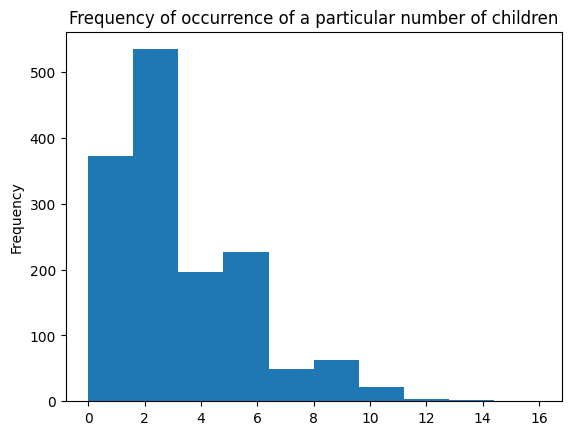

In [50]:
cmc.num_children.plot(kind='hist', title="Frequency of occurrence of a particular number of children")

### Plot the bar chart of the standard of living

<Axes: title={'center': 'Number of women in the study who have a certain standard of living'}, xlabel='standard_of_living_index'>

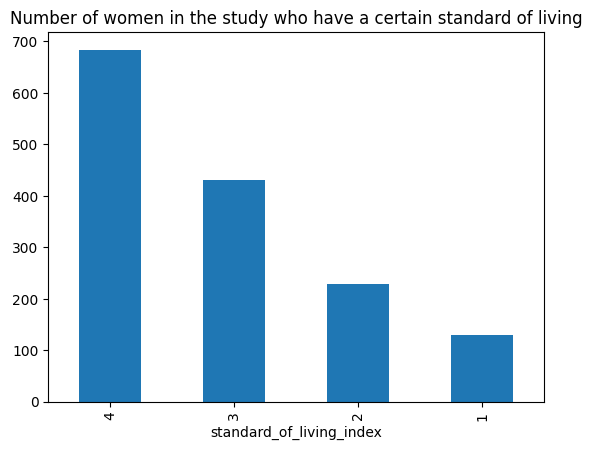

In [51]:
cmc.standard_of_living_index.value_counts().plot(kind='bar', title='Number of women in the study who have a certain standard of living')